# Apresentação:

O objetivo desse código é realizar um *benchmark* do algoritmo que eu construi. Para essa avaliação, vou utilizar o exercício do livro [Hands-On Machine Learning (O'Relly)](https://powerunit-ju.com/wp-content/uploads/2021/04/Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf).

Os dados aqui utilizados serão do *digits dataset* que é uma amostra de digitos tipo o MNIST, contendo $1797$ imagens $8 \times 8$ representando digitos de $0$ a $9$.

Descrição dos dados:
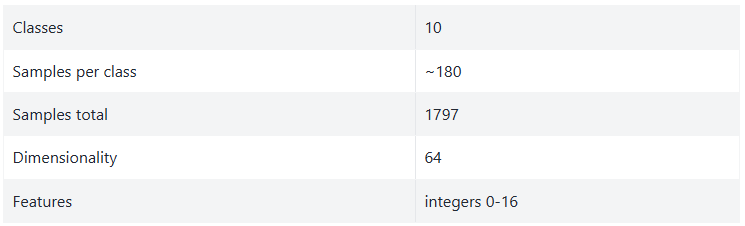

Documentações:
* sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
* dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#load-digits

In [ ]:
# Bibliotecas:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from matplotlib.image import imread
from tqdm import tqdm
import pandas as pd
import numpy as np

# Algoritmo do Livro:

O código aqui implementado foi retirado do livro, com algumas melhorias de implementação visando gerar melhoria no resultado.

## Importando e Tratando os dados:

In [ ]:
# Instanciando Dados:
digits = load_digits();digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
# Visualizando Dados:
df_original = pd.concat([pd.DataFrame(digits.data, columns=digits.feature_names),
                pd.DataFrame(digits.target, columns = ['target'])],axis=1);df_original

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [ ]:
df_original.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


Vemos que há a necessidade de normalizar os dados para eliminar problemas de escala, dado que o algoritmo do K-means, que trabalha com distância euclidiana, é vulnerável a problemas de escala.

In [ ]:
# Dataset Transformado:
df_transfor = df_original.copy()

In [ ]:
# Processo de Padronização:
for col in df_transfor.columns:
  if col != 'target':
    df_transfor[col] = (df_transfor[col] - df_transfor[col].min()) / (df_transfor[col].max() - df_transfor[col].min())

In [ ]:
df_transfor.dropna(axis=1, inplace = True,);df_transfor

,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.3125,0.8125,0.5625,0.0625,0.0000,0.0,0.0,0.0000,0.8125,...,0.0,0.0,0.000000,0.3750,0.8125,0.6250,0.0000,0.0000,0.0,0
1,0.0,0.0000,0.7500,0.8125,0.3125,0.0000,0.0,0.0,0.0000,0.0000,...,0.0,0.0,0.000000,0.0000,0.6875,1.0000,0.6250,0.0000,0.0,1
2,0.0,0.0000,0.2500,0.9375,0.7500,0.0000,0.0,0.0,0.0000,0.1875,...,0.0,0.0,0.000000,0.0000,0.1875,0.6875,1.0000,0.5625,0.0,2
3,0.0,0.4375,0.9375,0.8125,0.0625,0.0000,0.0,0.0,0.5000,0.8125,...,0.0,0.0,0.000000,0.4375,0.8125,0.8125,0.5625,0.0000,0.0,3
4,0.0,0.0000,0.0625,0.6875,0.0000,0.0000,0.0,0.0,0.0000,0.0000,...,0.0,0.0,0.000000,0.0000,0.1250,1.0000,0.2500,0.0000,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.2500,0.6250,0.8125,0.3750,0.0000,0.0,0.0,0.0625,1.0000,...,0.0,0.0,0.000000,0.1250,0.8750,0.9375,0.5625,0.0000,0.0,9
1793,0.0,0.3750,1.0000,0.8125,0.6875,0.0625,0.0,0.0,0.0000,1.0000,...,0.0,0.0,0.000000,0.3750,1.0000,0.8750,0.3750,0.0000,0.0,0
1794,0.0,0.0625,0.6875,0.9375,0.0625,0.0000,0.0,0.0,0.0000,0.8125,...,0.0,0.0,0.000000,0.1250,0.5625,0.8125,0.3750,0.0000,0.0,8
1795,0.0,0.1250,0.6250,0.4375,0.0000,0.0000,0.0,0.0,0.0000,0.8750,...,0.0,0.0,0.000000,0.3125,0.7500,1.0000,0.7500,0.0000,0.0,9


In [ ]:
df_transfor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 62 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_1  1797 non-null   float64
 1   pixel_0_2  1797 non-null   float64
 2   pixel_0_3  1797 non-null   float64
 3   pixel_0_4  1797 non-null   float64
 4   pixel_0_5  1797 non-null   float64
 5   pixel_0_6  1797 non-null   float64
 6   pixel_0_7  1797 non-null   float64
 7   pixel_1_0  1797 non-null   float64
 8   pixel_1_1  1797 non-null   float64
 9   pixel_1_2  1797 non-null   float64
 10  pixel_1_3  1797 non-null   float64
 11  pixel_1_4  1797 non-null   float64
 12  pixel_1_5  1797 non-null   float64
 13  pixel_1_6  1797 non-null   float64
 14  pixel_1_7  1797 non-null   float64
 15  pixel_2_0  1797 non-null   float64
 16  pixel_2_1  1797 non-null   float64
 17  pixel_2_2  1797 non-null   float64
 18  pixel_2_3  1797 non-null   float64
 19  pixel_2_4  1797 non-null   float64
 20  pixel_2_

## Modelagem

In [ ]:
# Explitando dados:
X_digits = df_transfor.drop('target', axis=1)
y_digits = df_transfor['target']

# Dados de Treino e Dados de Teste:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

### Otimizando Hiperparâmetros:
Daod

In [ ]:
# Primeiro Jeito:
ks_inertia = []
ks_score = []
for k in tqdm(range(2,200)):
  kmeans = KMeans(n_clusters=k,n_init='auto')
  kmeans.fit(df_transfor)
  ks_inertia.append(kmeans.inertia_)
  ks_score.append(kmeans.score(df_transfor))


100%|██████████| 198/198 [00:28<00:00,  7.01it/s]


Nota:

`inertia_` aqui é a **distorção** (*distortion*), ou seja,

* **Inertia Baixa:** Indica que os pontos de dados estão, em média, mais próximos dos centróides de seus respectivos clusters, o que sugere que os clusters são compactos e os centróides são representativos dos dados. Uma inércia mais baixa geralmente significa uma melhor definição dos clusters.

* **Inertia Alta:** Sugere que há uma maior dispersão dos pontos de dados em torno dos centróides, indicando que os clusters podem estar mais "espalhados" e menos bem definidos.

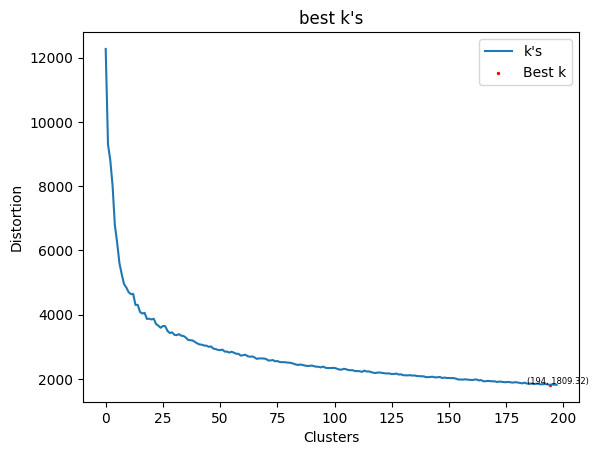

In [ ]:
# k ótimo:
bestK = min(ks_inertia), ks_inertia.index(min(ks_inertia))

# Visualização:
plt.plot(ks_inertia)
plt.scatter(bestK[1], bestK[0], color='red', s=2, label=f'Best K: {bestK[1]}')
plt.text(bestK[1]-10, bestK[0]+50, f'({bestK[1]}, {round(bestK[0],2)})', fontsize=6)
plt.title("best k's")
plt.xlabel('Clusters')
plt.ylabel('Distortion')
plt.legend(["k's","Best k"])
plt.show()

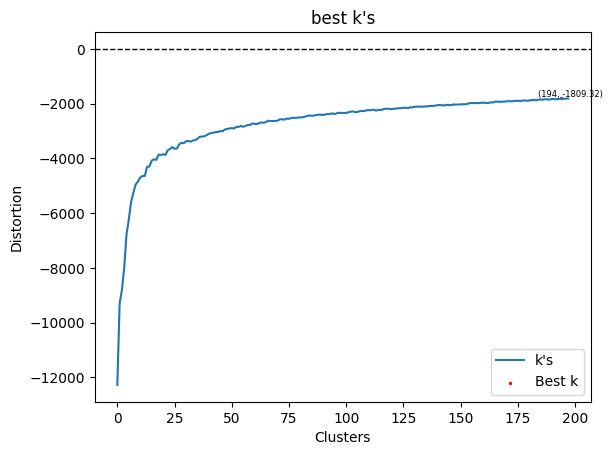

In [ ]:
# k ótimo:
bestK = max(ks_score), ks_score.index(max(ks_score))

# Visualização:
plt.plot(ks_score)
plt.scatter(bestK[1], bestK[0], color='red', s=2, label=f'Best K: {bestK[1]}')
plt.text(bestK[1]-10, bestK[0]+50, f'({bestK[1]}, {round(bestK[0],2)})', fontsize=6)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title("best k's")
plt.xlabel('Clusters')
plt.ylabel('Distortion')
plt.legend(["k's","Best k"],loc='lower right')
plt.show()

No `sklearn` tanto o método `score()` quanto o método `inertia_` dão, em módulo, o mesmo valor, como podemos ver. A diferença é o sinal. A título de vizualiação e explicabilidade, me parecem duas formas válidas de se visualizar os dados.

Dito isso, uma outra forma de treinar os hiperparâmetros seria utilizar classes do próprio sklearn para isso.

In [ ]:
# GridSearchCv para otimização de hiperparâmetros:
from sklearn.model_selection import GridSearchCV

In [ ]:
kmeans = KMeans(ks_score.index(max(ks_score)),n_init='auto')
y_pred = kmeans.fit_predict(df_transfor)

# K-means from Scratch:

## Algoritmo:
1. Retirar escala dos dados;
  * O método escolhido para retirar estala dos dados foi a padronização:
  $z_n = \frac{x-\mu}{\sigma}$
  
2. Inicializar centroids;
3. Etiquetar cada ponto;
4. Atualizar centroids;
5. Repeti-se os passos 3 e 4 os centroids pararem de mudar.

In [ ]:
# Função para normalizar os dados
def normalize_data(X):
    '''
    Normaliza os dados para ter média 0 e desvio padrão 1.

    # Entrada:
    numpy.ndarray: Matriz dos dados.

    # Saída:
    numpy.ndarray: Matriz dos dados normalizados.
    '''
    dados_normalizados = []
    for data_point in X.T: # Eu acho mais fácil trabalhar com variáveis como linhas.
        mean = np.mean(data_point)
        std = np.std(data_point)
        data_point_normalizado = [(valor - mean) / std for valor in data_point]
        dados_normalizados.append(data_point_normalizado)

    return np.array(dados_normalizados).T  # Transpondo de volta

In [ ]:
def initialize_centroids(X, K):
  '''
    Função criada para normalizar inicializar
  os centroides.

  # Entrada:
  numpy.ndarray: Matriz dos dados.
  int: Número de clusters.

  # Saída:
  numpy.ndarray: Matriz dos centróides.

  '''
  # Seleciona K pontos aleatórios do conjunto de dados como centróides iniciais
  indices = np.random.choice(X.shape[0], K, replace=False)
  centroids = X[indices]
  return centroids

In [ ]:
def assign_clusters(X, centroids):
  '''
  Atribui cada ponto de dados ao centroide mais próximo.

  # Entradas:
  numpy.ndarray: Matriz de dados X com formato (N, D), onde N é o número de pontos e D é o número de dimensões.
  numpy.ndarray: Matriz de centróides com formato (K, D), onde K é o número de clusters e D é o número de dimensões.

  # Saída:
  numpy.ndarray: Array de tamanho N contendo o índice do cluster mais próximo para cada ponto.
  '''
  # Atribui cada ponto de dados ao centroide mais próximo
  distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
  cluster_assignments = np.argmin(distances, axis=1)
  return cluster_assignments

In [ ]:
def update_centroids(X, cluster_assignments, K):
  '''
  Atualiza os centróides calculando a média dos pontos atribuídos a cada centroide.

  # Entradas:
  numpy.ndarray: Matriz de dados X com formato (N, D), onde N é o número de pontos e D é o número de dimensões.
  numpy.ndarray: Array de tamanho N contendo o índice do cluster mais próximo para cada ponto.
  int: Número de clusters.

  # Saída:
  numpy.ndarray: Matriz de centróides com formato (K, D), onde K é o número de clusters e D é o número de dimensões.
  '''
  # Atualiza os centróides calculando a média dos pontos atribuídos a cada centroide
  centroids = np.array([X[cluster_assignments == k].mean(axis=0) for k in range(K)])
  return centroids

In [ ]:
def compute_loss(X, centroids, cluster_assignments):
    '''
    Calcula a distorção (erro de reconstrução) no algoritmo K-means.

    # Entradas:
    numpy.ndarray: Matriz de dados X com formato (N, D), onde N é o número de pontos e D é o número de dimensões.
    numpy.ndarray: Matriz de centróides com formato (K, D), onde K é o número de clusters e D é o número de dimensões.
    numpy.ndarray: Array de tamanho N contendo o índice do cluster para cada ponto.

    # Saída:
    num: O valor da distorção, que é a soma das distâncias ao quadrado entre cada ponto e seu centroide correspondente.
    '''
    # Calcula a distorção (erro de reconstrução)
    loss = np.sum((X - centroids[cluster_assignments])**2)
    return loss

In [ ]:
def k_means(X, K, max_iters=100, tol=1e-4):
  '''
  Implementação do Algoritmo.

  # Entradas:
  numpy.ndarray: Matriz de dados X com formato (N, D), onde N é o número de pontos e D é o número de dimensões.
  int: Número de clusters.
  int: Número máximo de iterações

  # Saída:
  numpy.ndarray: Matriz de centróides com formato (K, D), onde K é o número de clusters e D é o número de dimensões.
  numpy.ndarray: Array de tamanho N contendo o índice do cluster para cada ponto.
  '''
  # Inicializa os centróides
  centroids = initialize_centroids(X, K)
  for i in range(max_iters):
      # Atribui os pontos de dados aos centróides mais próximos
      cluster_assignments = assign_clusters(X, centroids)
      # Calcula os novos centróides
      new_centroids = update_centroids(X, cluster_assignments, K)
      # Verifica a convergência (se os centróides mudaram pouco)
      if np.linalg.norm(new_centroids - centroids) < tol:
          break
      centroids = new_centroids
  # Calcula a distorção final
  final_loss = compute_loss(X, centroids, cluster_assignments)
  return centroids, cluster_assignments, final_loss